<a href="https://colab.research.google.com/github/NguyenHan243/fuzzylogic/blob/main/2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.2 MB/s eta 0:00:00


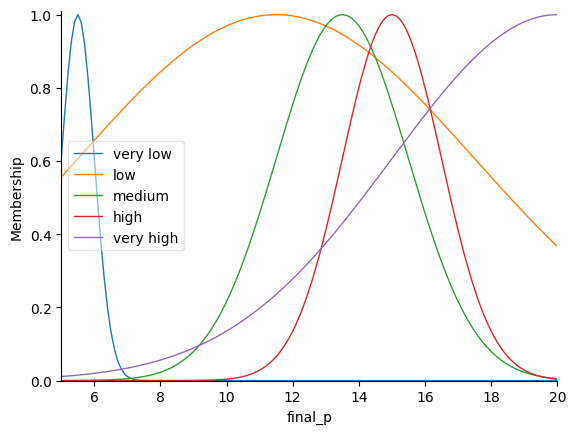

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

demand=ctrl.Antecedent(np.arange(1,500.1,0.1),'demand')
competitor_p=ctrl.Antecedent(np.arange(5,15.1,0.1),'competitor_p')
production=ctrl.Antecedent(np.arange(50,500.1,0.1),'production')
seasonality=ctrl.Antecedent(np.arange(1,12.1,0.1),'seasonality')
stock=ctrl.Antecedent(np.arange(0,5000.1,0.1),'stock')
final=ctrl.Consequent(np.arange(5,20.1,0.1),'final')

demand['low']=fuzz.gaussmf(demand.universe,50,49)
demand['medium']=fuzz.gaussmf(demand.universe,200,150)
demand['high']=fuzz.gaussmf(demand.universe,500,300)

competitor_p['very low']=fuzz.gaussmf(competitor_p.universe,8,3)
competitor_p['low']=fuzz.gaussmf(competitor_p.universe,10,2)
competitor_p['medium']=fuzz.gaussmf(competitor_p.universe,15,5)
competitor_p['high']=fuzz.gaussmf(competitor_p.universe,20,5)

production['low']=fuzz.gaussmf(production.universe,150,100)
production['medium']=fuzz.gaussmf(production.universe,500,350)
production['high']=fuzz.gaussmf(production.universe,1000,500)

seasonality['off-peak']=fuzz.trimf(seasonality.universe,[1,6,6])
seasonality['normal']=fuzz.trimf(seasonality.universe,[6,6,8])
seasonality['peak']=fuzz.trimf(seasonality.universe,[6,8,12])

stock['low']=fuzz.gaussmf(stock.universe,1000,1000)
stock['medium']=fuzz.gaussmf(stock.universe,2000,1000)
stock['high']=fuzz.gaussmf(stock.universe,3500,1500)
stock['very high']=fuzz.gaussmf(stock.universe,5000,1500)

final['very low']=fuzz.gaussmf(final.universe,5.5,0.5)
final['low']=fuzz.gaussmf(final.universe,11.5,6)
final['medium']=fuzz.gaussmf(final.universe,13.5,2)
final['high']=fuzz.gaussmf(final.universe,15,1.5)
final['very high']=fuzz.gaussmf(final.universe,20,5)


In [ ]:
rule1=ctrl.Rule(demand['high']&competitor_p['high']&stock['low'],final['very high'])
rule2=ctrl.Rule(demand['high']&seasonality['peak']&stock['low'],final['very high'])
rule3=ctrl.Rule(demand['medium']&production['high']&stock['low'],final['very high'])

rule4=ctrl.Rule(demand['high']&competitor_p['medium']&stock['medium'],final['high'])
rule5=ctrl.Rule(demand['medium']&competitor_p['high']&stock['low'],final['high'])
rule6=ctrl.Rule(demand['high']&seasonality['peak']&stock['medium'],final['high'])

rule7=ctrl.Rule(demand['medium']&competitor_p['medium']&stock['medium'],final['medium'])
rule8=ctrl.Rule(demand['low']&competitor_p['high']&stock['medium'],final['medium'])
rule9=ctrl.Rule(demand['medium']&production['medium']&stock['medium'],final['medium'])

rule10=ctrl.Rule(demand['low']&competitor_p['low']&stock['high'],final['low'])
rule11=ctrl.Rule(demand['medium']&production['low']&stock['high'],final['low'])
rule12=ctrl.Rule(demand['low']&seasonality['off-peak']&stock['high'],final['low'])

rule13=ctrl.Rule(demand['low']&competitor_p['low']&stock['very high'],final['very low'])
rule14=ctrl.Rule(demand['low']&seasonality['off-peak']&stock['very high'],final['very low'])
rule15=ctrl.Rule(demand['medium']&competitor_p['very low']&stock['very high'],final['very low'])